# Supervised Learning - Project

## Notebook by Julie Leung
### November 16, 2023

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # for Shapiro-Wilks test, ttest_ind
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

#from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report

# from sklearn.model_selection import KFold

# import sklearn.metrics as sklm # for f1_score, recall_score, precision_score, r2_score, roc_auc_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

In [3]:
# Load the dataset
df = pd.read_csv('Wholesale_Data.csv')

## Preliminary exploration of the dataset/dataframe

In [4]:
# Look at first 5 rows to see columns and type of data
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Findings: Channel and Region have numbers that signify a unique area and the means, etc. aren't that meaningful.

The 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen' are types of products sold, and, according to <a href="https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set">Kaggle</a> are "annual spending in monetary units on diverse product categories".

In [37]:
# Set up column names for products:
products = df.columns[~df.columns.isin(['Channel', 'Region'])].tolist()
products

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

## EDA: Look at dtypes, shape, describe(), and null values.

In [6]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
df.shape

(440, 8)

In [8]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [27]:
# Get a more meaningful list of descriptive statistics for the product categories
df.drop(['Channel', 'Region'], axis=1).describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Findings:  Average spend (monetary units) for various categories are per above.

In [23]:
# Find out what unique values for Channel and Region, and counts for each
for col in ['Channel', 'Region']:
    print(f"\n\n{df[col].value_counts().sort_index(ascending=True)}")



Channel
1    298
2    142
Name: count, dtype: int64


Region
1     77
2     47
3    316
Name: count, dtype: int64


In [9]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Finding: There are no null values in this dataset.  Clearly the dataset provided for this project has already been cleaned to remove null values, from the original dataset.  Thanks, LHL!
https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set

At first glance, there does not appear to be 'incorrect' data.  We would not know if the data were incorrect since there are no nulls and all values are numerical.  Further visualization in terms of boxplots, histograms and scatterplots are valuable and will be done.

### EDA: Check for duplicates.

In [31]:
df[df.duplicated()]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Finding:  No duplicate rows in dataset.

### EDA:  What are counts for each product type per Channel?  Per Region?

In [35]:
# Counts grouped by Channel & Region:
df.groupby(['Channel', 'Region']).size()

Channel  Region
1        1          59
         2          28
         3         211
2        1          18
         2          19
         3         105
dtype: int64

In [32]:
# Counts per Channel
df.groupby('Channel').size()

Channel
1    298
2    142
dtype: int64

Finding:  There are almost 2x the number of entries for Channel 1 as Channel 2.

In [33]:
# Counts per Region
df.groupby('Region').size()

Region
1     77
2     47
3    316
dtype: int64

Finding:  There are almost 10x the number of entries for Region 3 as Region 2, and over 3x the number of entries for Region 3 as Region 1.

In [45]:
# TODO:  Delete me - this is silly

for category in products:
    print(f"\nGrouping by product category {category}:\n{df.groupby(['Channel', 'Region'])[category].value_counts()}")


Grouping by product category Fresh:
Channel  Region  Fresh
1        1       514      1
                 583      1
                 31614    1
                 56083    1
                 53205    1
                         ..
2        3       2932     1
                 2861     1
                 2771     1
                 2343     1
                 44466    1
Name: count, Length: 439, dtype: int64

Grouping by product category Milk:
Channel  Region  Milk 
1        1       659      2
                 1115     2
                 258      1
                 23527    1
                 17972    1
                         ..
2        3       6208     1
                 6200     1
                 6152     1
                 6128     1
                 73498    1
Name: count, Length: 435, dtype: int64

Grouping by product category Grocery:
Channel  Region  Grocery
1        1       1563       2
                 489        1
                 16966      1
                 13699      1
   

### EDA:  How are the variables in this dataset correlated to each other?

In [46]:
# Print Pearson R correlation matrix
corr_matrix = df.corr(method='pearson')
corr_matrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [47]:
# Visualize correlation matrix, which will show the correlations between the variables with each other
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.00,0.06,-0.17,0.46,0.61,-0.20,0.64,0.06
Region,0.06,1.00,0.06,0.03,0.01,-0.02,-0.00,0.05
Fresh,-0.17,0.06,1.00,0.10,-0.01,0.35,-0.10,0.24
Milk,0.46,0.03,0.10,1.00,0.73,0.12,0.66,0.41
Grocery,0.61,0.01,-0.01,0.73,1.00,-0.04,0.92,0.21
Frozen,-0.20,-0.02,0.35,0.12,-0.04,1.00,-0.13,0.39
Detergents_Paper,0.64,-0.00,-0.10,0.66,0.92,-0.13,1.00,0.07
Delicassen,0.06,0.05,0.24,0.41,0.21,0.39,0.07,1.00


### EDA: Show Distribution (Histogram) of all columns

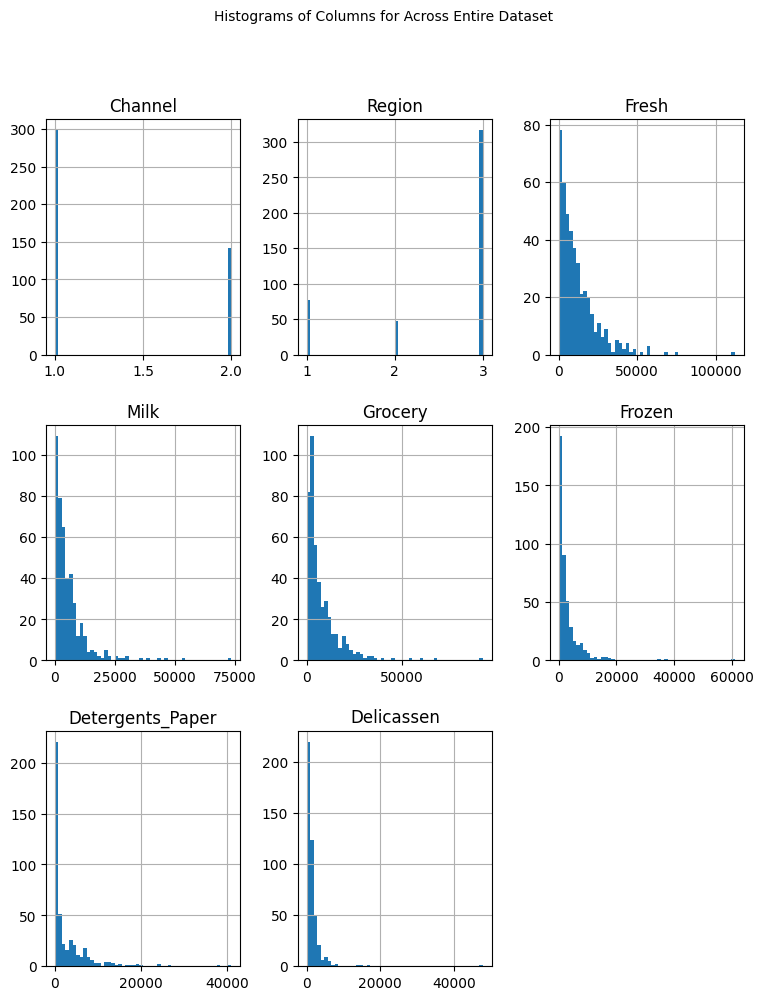

In [50]:
# Plot distributions of all columns (the Channel and Region are included here for interest)
df.hist(bins=50, figsize=(9, 11))
plt.suptitle('Histograms of Columns for Across Entire Dataset', fontsize=10)
plt.show()

Findings: All product category columns appear not to be normally distributed.  Do Shapiro-Wilks test to confirm.

Need to exercise caution with use of any models that assume normal distribution (though I do not believe unsupervised learning algorithms make this assumption)

In [51]:
# Check for normality via Shapiro-Wilks

for category in products:
    stat, p = stats.shapiro(df[category])
    print (f"Product Category {category}: Shapiro-Wilks test p-value={p}.  Data are{'' if round(p, 2) > 0.05 else ' **NOT**'} normally distributed.")

Product Category Fresh: Shapiro-Wilks test p-value=7.91843824961924e-24.  Data are **NOT** normally distributed.
Product Category Milk: Shapiro-Wilks test p-value=9.762061919511109e-30.  Data are **NOT** normally distributed.
Product Category Grocery: Shapiro-Wilks test p-value=3.906127057558714e-28.  Data are **NOT** normally distributed.
Product Category Frozen: Shapiro-Wilks test p-value=1.2913321191929252e-32.  Data are **NOT** normally distributed.
Product Category Detergents_Paper: Shapiro-Wilks test p-value=1.9145929126306173e-30.  Data are **NOT** normally distributed.
Product Category Delicassen: Shapiro-Wilks test p-value=1.7534077741301854e-36.  Data are **NOT** normally distributed.


Finding:  All product category variables are *NOT* normally distributed according to Shapiro-Wilks test.

Caution must be employed in utilizing any models or methods that assume normality in the predictor variables.

### EDA: Draw Boxplots to eyeball outliers in product category variables

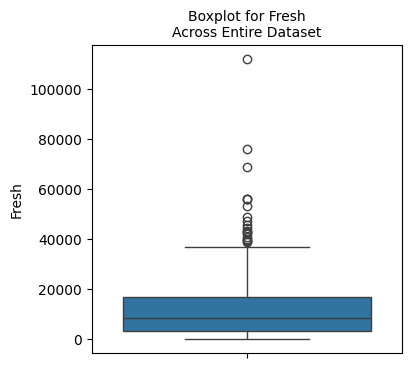

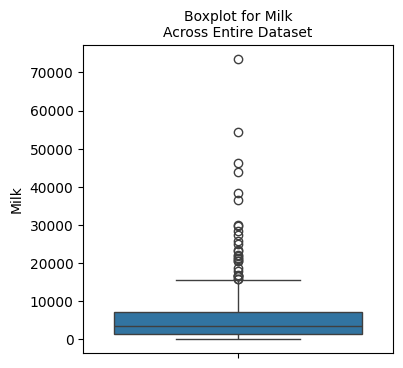

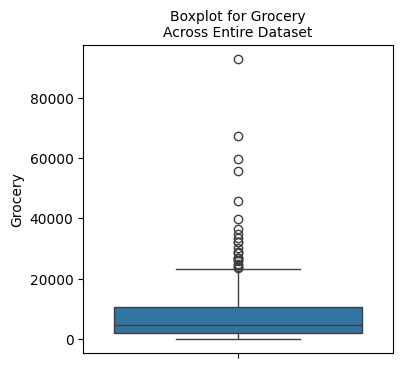

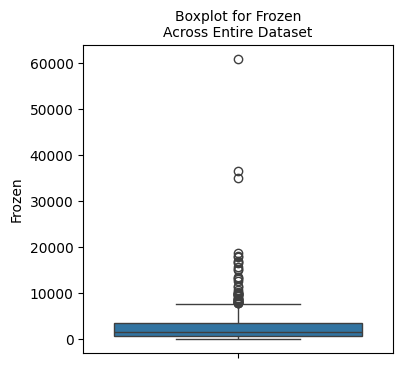

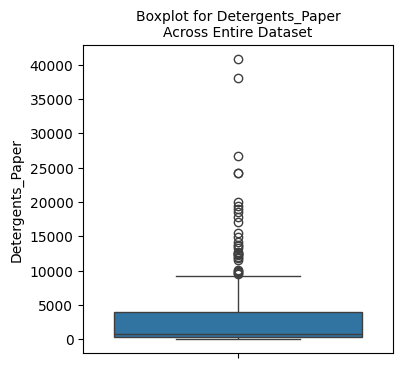

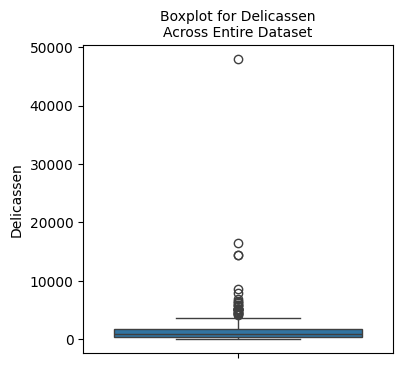

In [52]:
# Boxplots for all predictor variables across both Outcomes
for category in products:
    plt.figure(figsize=(4,4))
    plt.title(f'Boxplot for {category}\nAcross Entire Dataset', fontsize=10)
    sns.boxplot(df[category])

Finding:  There are a lot of outliers in every Product Category!

### EDA: Outliers:  Display all outliers per Category, and %age in dataset for each Category that are outliers

In [62]:
# Define a function that will list out the passed in Series' Q1, Q3, IQR and count and values of outliers
# Best practise would be to put this in its own .py file (perhaps even in its own "OutlierUtilities" class),
#  and import file here, and instatntiate a OutlierUtils object to invoke method, but there is limited time to complete this project today so will not do.

def GetOutlierInfo(series):
    q1 = np.quantile(series, 0.25)
    q3 = np.quantile(series, 0.75)
    med = np.median(series)
    iqr = q3 - q1
    outlierspread = 1.5*iqr
    upper = q3+(1.5*outlierspread)
    lower = q1-(1.5*outlierspread)

    outliers = series[(series <= lower) | (series >= upper)]
    print (f"q1 = {q1}, q3 = {q3}, iqr = {iqr}, outlier_spread = {outlierspread}, upperbound = {upper}, lowerbound = {lower}")
    print (f"{len(outliers)} of Outliers within {category}, or {round((len(outliers)/df.shape[0])*100,2)}%:\n")
    print ("Outliers within the box plot are:\n{}".format(outliers))
    return outliers

In [63]:
# Get outlier print out for each Category
for category in products:
    print(f"\nFor Predictor {category}:")
    GetOutlierInfo(df[category])


For Predictor Fresh:
q1 = 3127.75, q3 = 16933.75, iqr = 13806.0, outlier_spread = 20709.0, upperbound = 47997.25, lowerbound = -27935.75
8 of Outliers within Fresh, or 1.82%:

Outliers within the box plot are:
39      56159
103     56082
125     76237
181    112151
258     56083
259     53205
282     49063
284     68951
Name: Fresh, dtype: int64

For Predictor Milk:
q1 = 1533.0, q3 = 7190.25, iqr = 5657.25, outlier_spread = 8485.875, upperbound = 19919.0625, lowerbound = -11195.8125
20 of Outliers within Milk, or 4.55%:

Outliers within the box plot are:
23     36423
28     20484
45     22044
47     54259
49     21412
56     29892
61     38369
65     20959
85     46197
86     73498
92     27472
171    25862
181    29627
183    43950
211    28326
251    23133
265    23527
309    20655
319    25071
384    21858
Name: Milk, dtype: int64

For Predictor Grocery:
q1 = 2153.0, q3 = 10655.75, iqr = 8502.75, outlier_spread = 12754.125, upperbound = 29786.9375, lowerbound = -16978.1875
12 of Ou

Finding:  There are a reasonable number of outliers in each Product Category.  It is hard to remove these, because it will remove some of the variance which will be valuable for PCA analysis, and may take some of the "information" away that will help with KMeans clustering and Hierarchy (dendrogram) definition!

| Category         | # Outliers | # Total Points | % Outliers |
|------------------|------------|----------------|------------|
| Fresh            | 8          | 440            | 1.82       |
| Milk             | 20         | 440            | 4.55       |
| Grocery          | 12         | 440            | 2.73       |
| Frozen           | 23         | 440            | 5.23       |
| Detergents_Paper | 22         | 440            | 5          |
| Delicassen       | 19         | 440            | 4.32       |

### EDA:  Scatterplots of all variables against each other.  We are particularly interested in scatterplots between Product Category variables

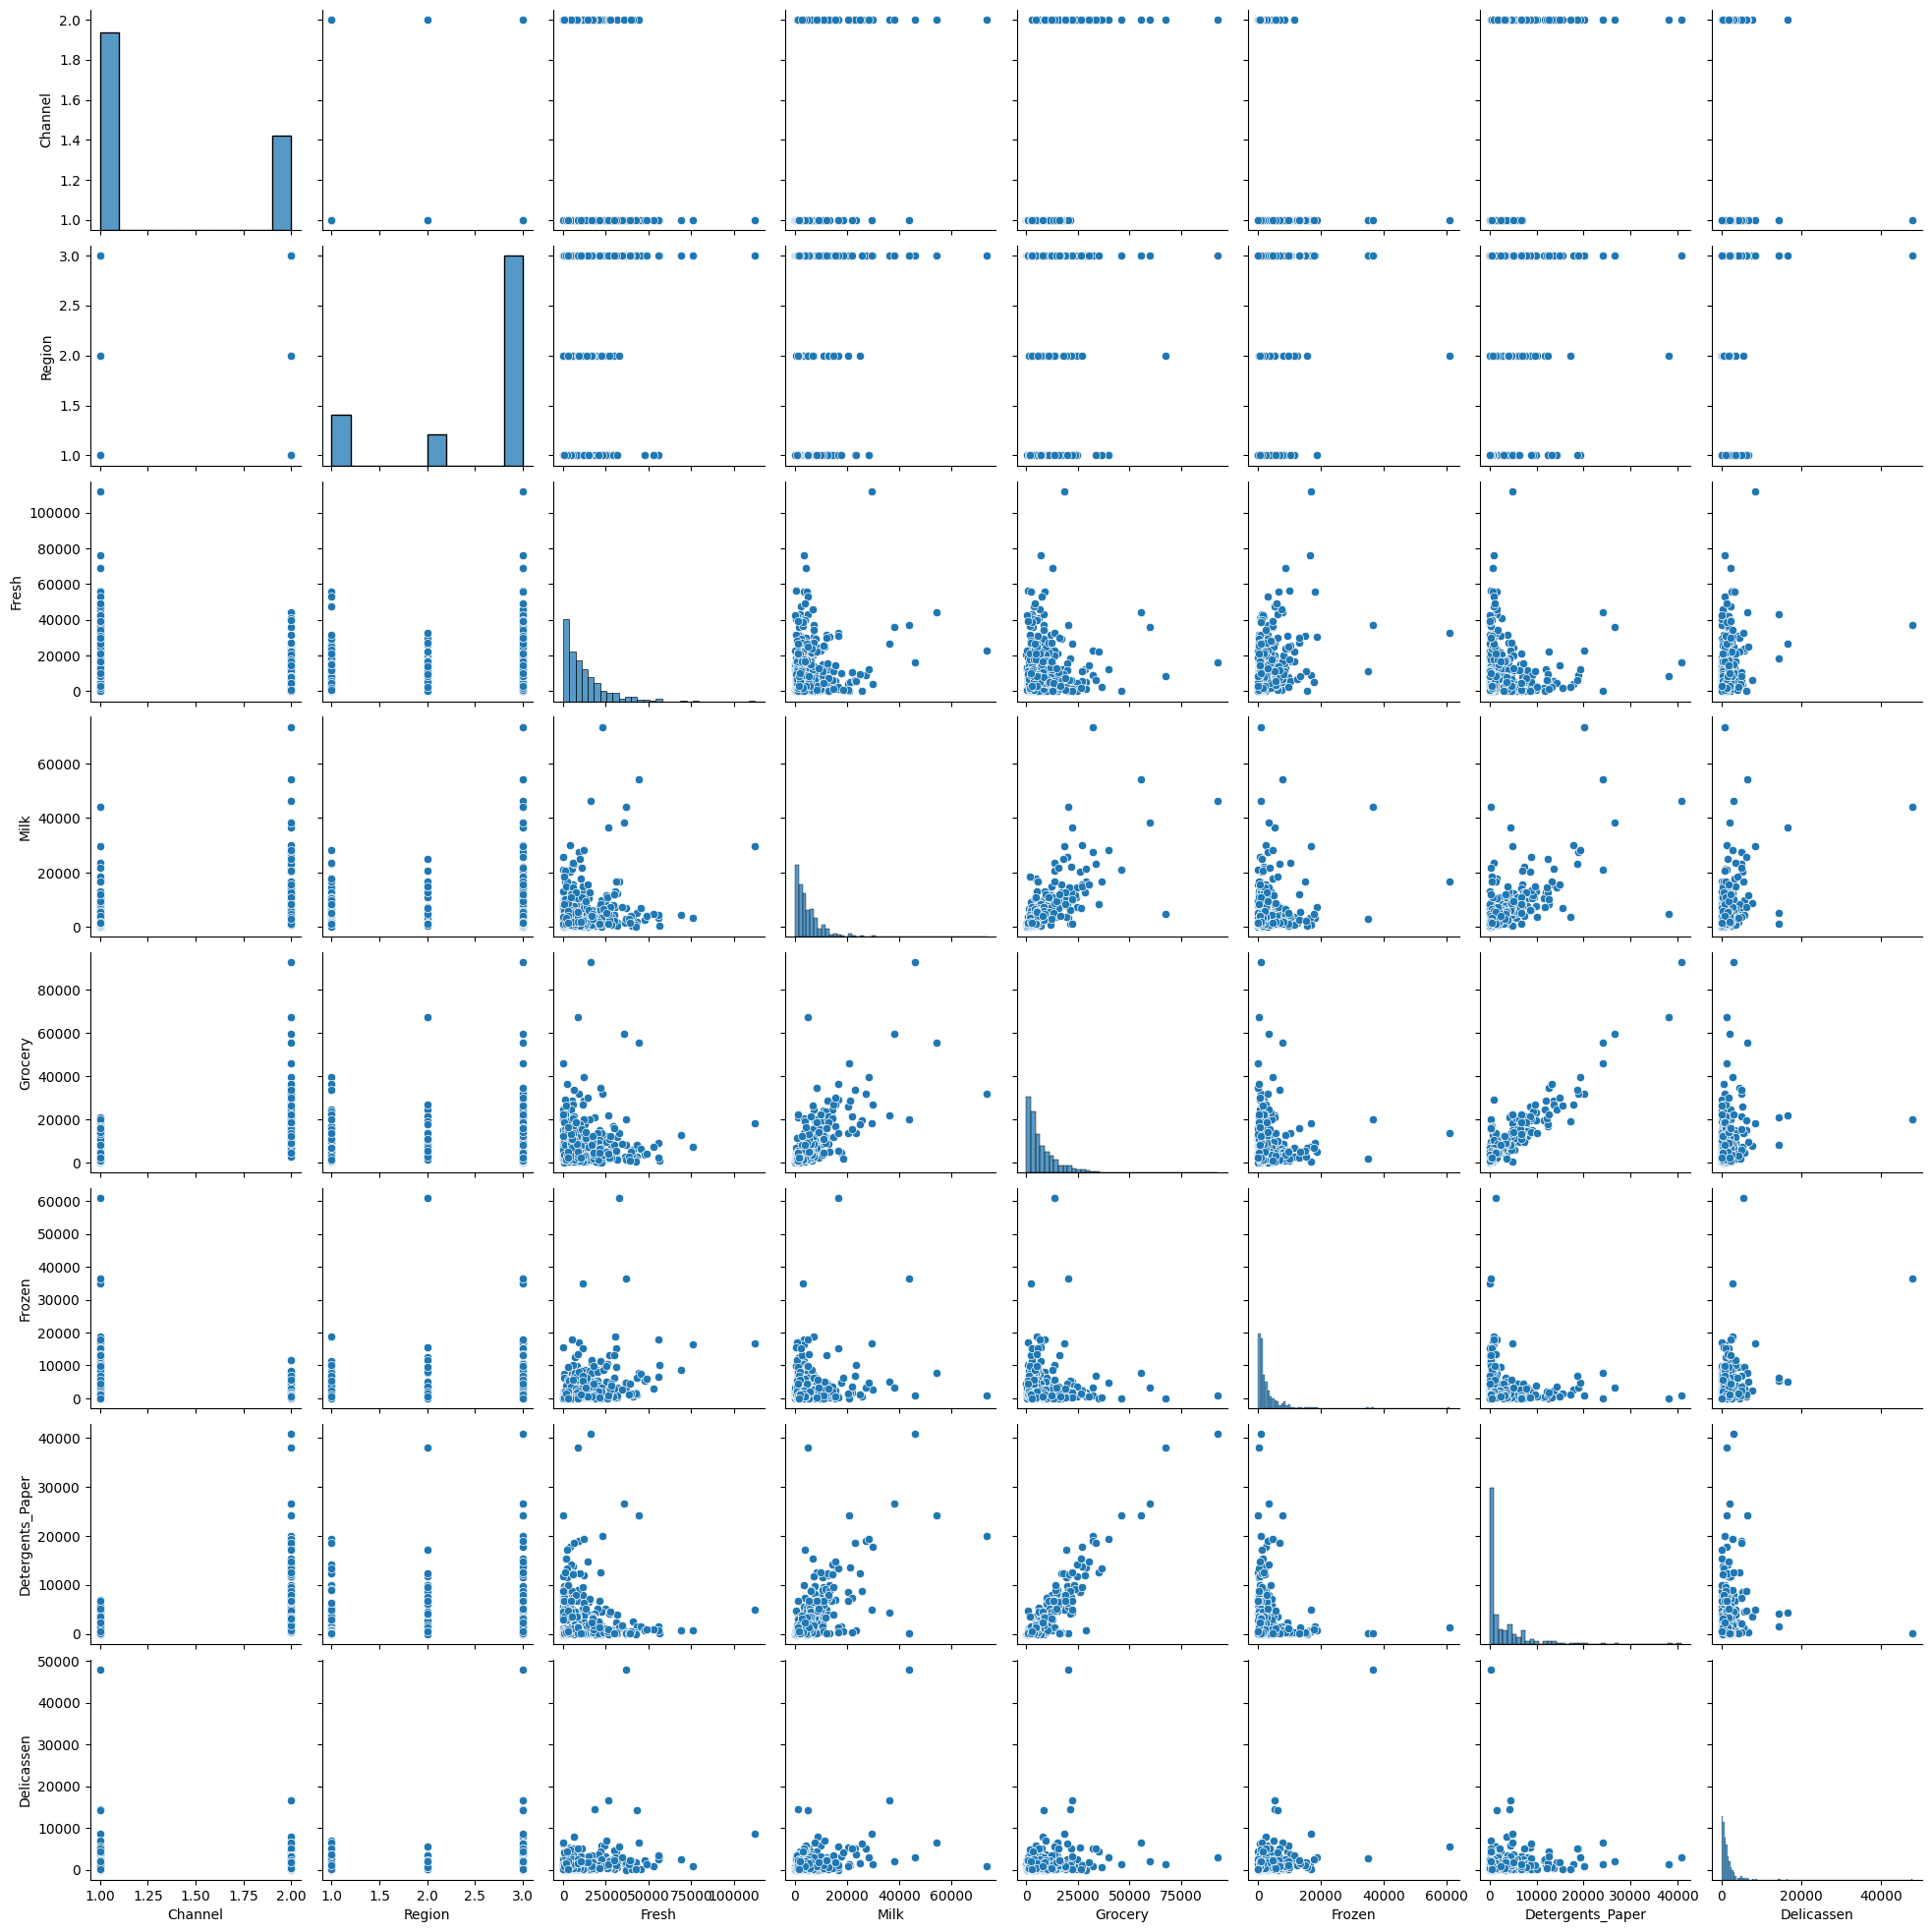

In [64]:
sns.pairplot(df)

Findings:

* Scatterplot of Product Categories against Channel and Region do not show obvious clustering to the naked eye
* Grocery & Milk, Grocery & Detergents_Paper show a possible correlation, which was already shown in the Correlation Matrix/Heat Map
* Milk & Detergents_Paper also show a mild correlation

## Notes on Pre-Processing

The goal of the clustering is segment the clients of this wholesale distributor based on their annual spending on various product categories.

The data in the Product Categories columns are all of the same scale (i.e. "monetary units") according to the Kaggle description of this dataset.
Given that the data in the Product Categories columns are of the same scale, we do not run this data through a Scaler to "normalize it" across columns, but rather in order to improve with convergence, and help with distance sensitivity given that KMeans clustering uses a distance-based algorithm to determine clusters.

### Scaled Products Section

In [90]:
# Create scaled NumPy array for X_scaled_products
scaler = StandardScaler()
X_scaled_products = scaler.fit_transform(df[products])
X_scaled_products

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

### Non-Scaled Products Section

In [89]:
# Also try without scaling, so just create the NumPy array for X (df[products].values that is not scaled)
X_products = df[products].values
X_products

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

### Define useful functions - Credit to Amir Parizi for these functions, defined in "Centroid Model - Tutorial.ipynb" for LHL
From <a href="https://github.com/lighthouse-labs/unsupervised-learning/blob/main/Centroid%20Model%20-%20Tutorial.ipynb">Centroid Model - Tutorial.ipynb (unsupervised-learning project)</a>

In [70]:
###
### Useful Functions:
### Credit to Amir Parizi:  https://github.com/lighthouse-labs/unsupervised-learning/blob/main/Centroid%20Model%20-%20Tutorial.ipynb
###

# Function that Plots Distortion for Elbow Rule
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()


# Function that plots (visualizes) clusters after we define the clusters from KMeans model
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()


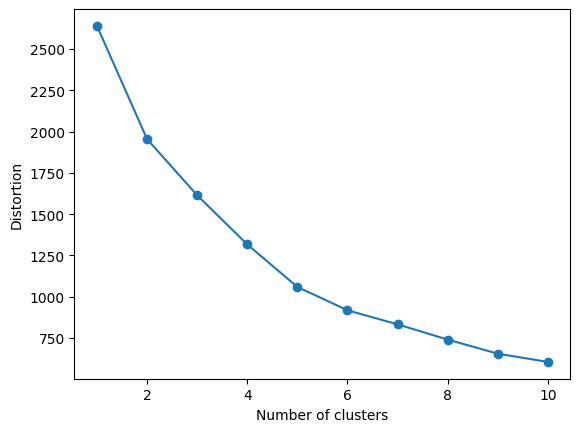

In [91]:
# Let's try to figure out what the best k value is by plotting graph to use Elbow Rule

# This is the plot of Scaled product category data
plot_distortion(X_scaled_products, max_clusters=10)

Findings:  It is a bit difficult to see the sharp bend above.  Let's try this plot with non-Scaled data!

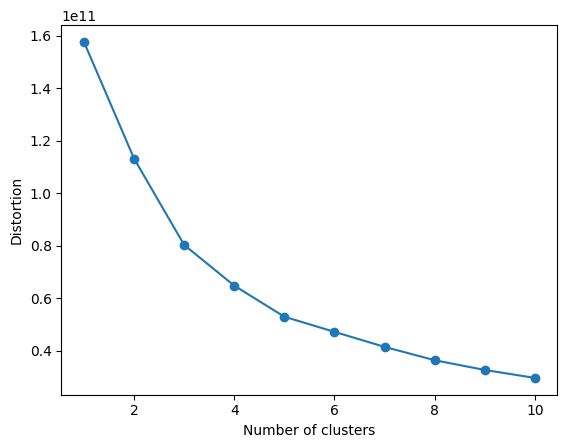

In [92]:
# This is the plot of NON-Scaled product category data
plot_distortion(X_products, max_clusters=10)

Findings:  The non-scaled data seems to show a more significantly "sharp" elbow at n_clusters=3.  So we will use that in our model!

In [93]:
### Build the K-Means model with n_customers = 3, per elbow rule findings above.

# Create the km object
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init='auto',
            random_state=42)

# Fit and Predict the model
y_km_clusters_scaled = km.fit_predict(X_scaled_products)

### Using Scaled Data

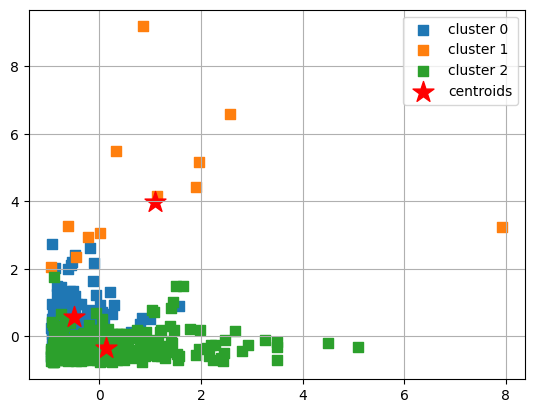

In [94]:
# Let's plot our clusters using Amir's handy function!
plot_clusters(X_scaled_products, y_km_clusters_scaled, plt_cluster_centers=True)

Findings: These clusters arrived at when using the Scaled products (X_scaled_products) are kind of hard to see.  Let's try without scaling!

### Using Non-Scaled Data

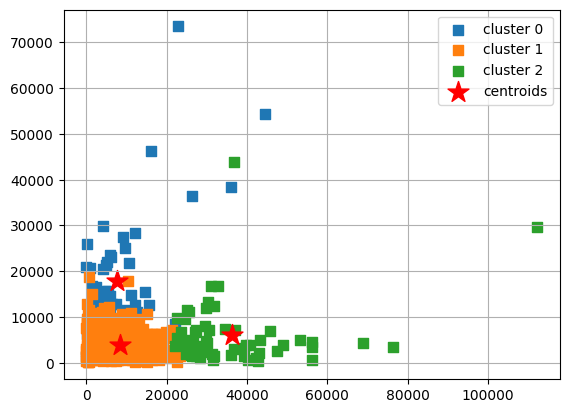

In [95]:
# Create the km2 object for a model that uses non-scaled data
km2 = KMeans(n_clusters=3,
            init='k-means++',
            n_init='auto',
            random_state=42)

# Fit and Predict the model
y_km_clusters = km2.fit_predict(X_products)

# Plot the clusters for the non-scaled data
plot_clusters(X_products, y_km_clusters, plt_cluster_centers=True)

Findings:  This is a lot easier to see the different clusters when using non-scaled products data.

### Conclusion for K-Means clustering:

There appear to be 3 different clusters of clients of this wholesale distributor based on their annual spending across all the product categories sold!

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

### Define useful functions - Credit to Amir Parizi for these functions, defined in "Hierarchical Model - Tutorial.ipynb" for LHL
From <a href="https://github.com/lighthouse-labs/unsupervised-learning/blob/main/Hierarchical%20Model%20-%20Tutorial.ipynb">Hierarchical Model - Tutorial.ipynb (unsupervised-learning project)</a>

In [ ]:
###
### Useful Functions:
### Credit to Amir Parizi:  https://github.com/lighthouse-labs/unsupervised-learning/blob/main/Hierarchical%20Model%20-%20Tutorial.ipynb
###

# Define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

Per the above discoveries using this dataset, we will set the n_clusters as 3.

We will run the AgglomerativeClustering model with both Scaled and Unscaled Product Category data.  (See notes on Preprocessing from above).

Agglomerativ Clustering calculates Euclidean distance to calculate the clusters, so convergence may be aided by reducing the absolute size of the data (hence, scaling).  Let's see how the scaled vs. non-scaled models look.

### Using Scaled Data

In [100]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

c:\Users\raref\.conda\envs\bootcamp_env\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


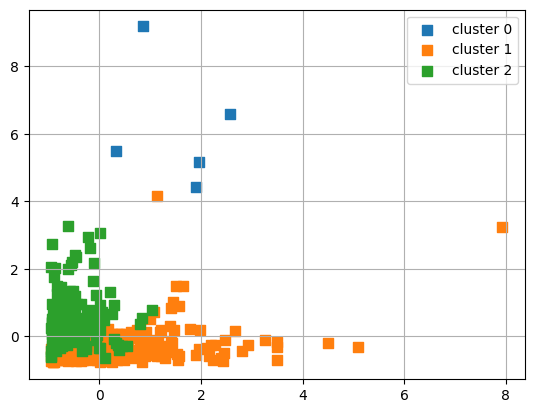

In [101]:
# Fit the model - Scaled, and Plot Clusters!
y_hc_scaled = ac.fit_predict(X_scaled_products)
plot_clusters(X_scaled_products, y_hc_scaled)

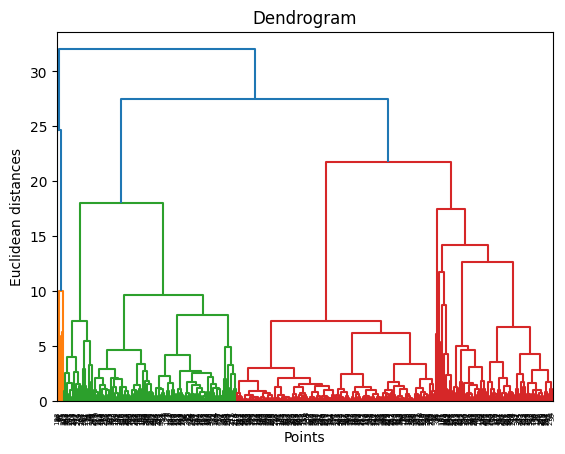

In [102]:
# Plot the Dendrogram - Scaled
plot_dendrogram(X_scaled_products)

Findings:  Just like KMeans, using scaled data seems to really concentrate the Euclidian distances of the dendrogram because the numbers are so small (StandardScaler makes everything with a mean of 0 and standard deviation of 1.
                                                                                                                                                       
Using scaled data also makes the clusters not as definitive, when using KMeans and drawing the centroids on a graph.

Let's try with non-scaled data and see if the clustering and dendrogram looks more organized and 'obvious'.

### Using Non-Scaled Data

c:\Users\raref\.conda\envs\bootcamp_env\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


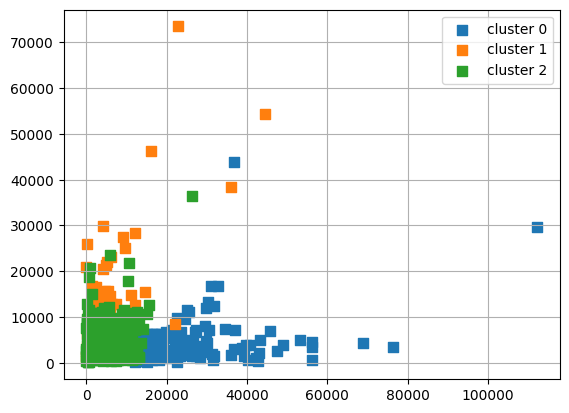

In [103]:
# Fit the model - Non-Scaled, and Plot Clusters!
y_hc = ac.fit_predict(X_products)
plot_clusters(X_products, y_hc)

Findings:  Again, using the non-scaled data makes the clusters look more distinct and tidy.  Let's see what the Dendrogram looks like with non-scaled data.

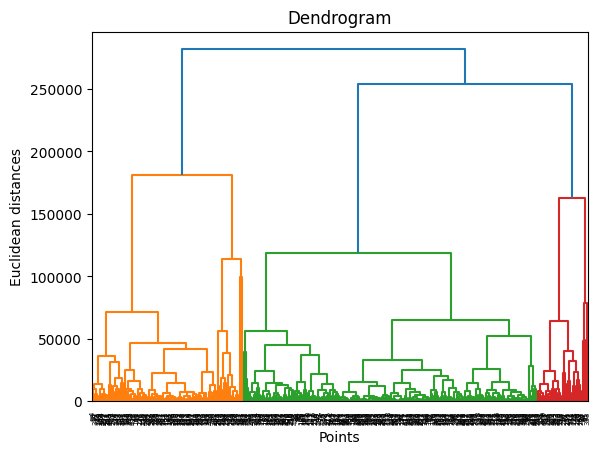

In [104]:
# Plot the Dendrogram - Non-Scaled
plot_dendrogram(X_products)

Findings:  Using non-scaled data makes the Dendrogram showing the hierarchy also look more definitive between clusters, and tidier.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.